# PDA data science - Yahoo Finance
<div class="alert alert-block alert-info">
    Notebook 4: by Michael Ferrie, Nov 2024
</div>

## Introduction to API's

For those who might be unfamiliar, API stands for Application Programming Interface. An API is actually an interface that has a set of functions. These set of functions allow programmers to acquire some specific features or the data of an application. Web API is an API as the name suggests, it can be accessed over the web using the HTTP protocol. It is a framework that helps you to create and develop HTTP based RESTFUL services. Once we can access an API programmatically we can create requests to send to it in order to return data that is useful to us. Many companies offer useful public API's and python allows us to connect to these.

## Yahoo Finance
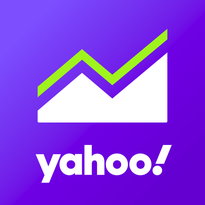

Yahoo Finance used to have their own official API, but this was decommissioned in May 2017, following wide-spread misuse of data. These days a range of unofficial APIs and libraries exist to access the same data, including yfinance.

The project yfinance was developed by [Ran Aroussi](https://aroussi.com/about) and offers a replacement for the old Yahoo API and we can use it with Python to download market data from Yahoo! finance. Before getting started you should install the library with pip:

`pip install yfinance`

With yfinance we can obtain historical and real time data for a variety of financial markets and products, as shown on [Yahoo Finance](https://finance.yahoo.com/).

A stock ticker reports transaction and price data, these tickers, update continuously throughout the day. Have a look at the list of [tickers](https://finance.yahoo.com/trending-tickers).

OHLC is a financial term for Open Close Low High, this is the value of a stock when the market opens and closes and the lowest point and highest point in a particular duration.

Read through the notebook and run each of the examples then answer the [questions](#Questions) at the end.

<b>If this notebook returns an HTTP error such as 401 any time while running requests, we need to pretend to log into the website using this request, this is sometimes called 'posting a session cookie' to do this, run the code in the next cell, each time you see this warning... </b>

In [ ]:
import requests
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}
a = requests.get('https://finance.yahoo.com/quote/AAPL/financials?p=AAPL', headers= headers)
a.raise_for_status()
import warnings
warnings.filterwarnings('ignore')

## Getting a reply from the API

* First we will import the `yfinance` library, then using the Ticker module, we can search for information on Google, they have the abbreviation GOOG, run the following you should get a response from the API. The Ticker module, allows you to access ticker data in a more Pythonic way.

In [ ]:
# import library
import yfinance as yf

# assign data to a variable, then print result
goog = yf.Ticker("GOOG")
print(goog.info)

## Specifying date ranges
We can specify a date range for data to be returned, The full range of intervals available are:

1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [ ]:
# specify 3 days with '3d' of data from the API
data = yf.download(['GOOG'], period='1d')
# print()
# print(data)

# the data comes from the API as a pandas dataframe
print(type(data))
data.head()

## Access Microsoft finances

Here is how to get some data on Microsoft, we will explore some of the options of the library.All of the available options are here: https://pypi.org/project/yfinance/

In [ ]:
# connect to site first
import requests
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}
a = requests.get('https://finance.yahoo.com/quote/AAPL/financials?p=AAPL', headers= headers)
a.raise_for_status()

In [ ]:
# dowload microsoft ticker
msft = yf.Ticker("MSFT")

# get stock info
print(msft.info)

In [ ]:
# get historical market data
hist = msft.history(period="max")

# show major holders
msft.major_holders

# show cashflow
msft.cashflow

# print some of the data
print(msft.cashflow)
print(msft.major_holders)

# show the data type
print(type(msft.cashflow))

In [ ]:
msft.cashflow

## Multiple stocks

We can download data for one ticker using the Ticker object and multiple tickers using the download method.

In [ ]:
# get data for google and meta for one month
df = yf.download(['GOOG','META'], period='1mo')

# use head to show only the top of the dataframe
df.head()

In [ ]:
# Specify the date range and group by ticker (Remember dates are in american middle endian, change YYYY to this year)
df = yf.download(['GOOG','META'], start='2026-01-01', end='2026-01-31', group_by='ticker')
df.head()

## Bitcoin value in USD
Let's have a look at some Bitcoin data, this will pull the Bitcoin value for the first week in February, we can set the interval to 1 hour so that we can see the value change.

In [ ]:
# change YYYY to this year
df = yf.download(['BTC-USD'], start='2025-02-01', end='2025-02-07', interval='1h')
df.index
# print(df)

## Get some statistics from the data
Once we get the data into a pandas dataframe we can run many possible operations on it, have a look at the [list](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html). There are so many possibilities, the trick is being able to understand the documentation so you can use them. Here are some examples:

In [ ]:
# Describe will give you an overview of the data
df.describe()

In [ ]:
# Access a specific column in the data with []
print(df['High'].mean())
print(df['High'].min())
print(df['High'].max())
print(df['High'].median())

## Visualise the data
Pandas has a simple plot function and it will let us access specific columns in the dataframe, it understands the shape of the data and it is easy to work with. This will allow us to see the Bitcoin value in USD over the week that we have data for. We could use this to see when the best and worst times to buy bitcoin were.

In [ ]:
# Plot the open column
df["Open"].plot()

In [ ]:
# Plot the close column
df["Close"].plot()

In [ ]:
# Adding some extra details to the plot
ax = df['Open'].plot(kind='line', title="My Plot", xlabel="Date", ylabel="Value in USD")

## Multiple line Plots
Now if we want to compare two plots side by side we need another library, if you have not already, install Matplotlib, we need to use pyplot from this library for this next task.

`pip install matplotlib`

First we want to pass multiple columns in the data frame to the plot function, and assign them a colour, then we can add a title and some labels, and a legend.

In [ ]:
# import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6,16), sharex=True, tight_layout=True)
# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green', ax=ax1, ylabel='Value in UDS', xlabel='Date')
df['Close'].plot(label='Close', color='orange', ax=ax2, ylabel='Value in UDS', xlabel='Date')
df['High'].plot(label='High', color='blue', ax=ax3, ylabel='Value in UDS', xlabel='Date')
df['Low'].plot(label='Low', color='red', ax=ax4, ylabel='Value in UDS', xlabel='Date')

# adding title to the plot
ax1.set_title('Bitcoin in USD for Week 1 in February')
ax1.legend(['Open'])
ax2.legend(['Close'])
ax3.legend(['High'])
ax4.legend(['Low'])
# ax4.xaxis.set_major_locator(mdates.DayLocator(interval=24))
# ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# adding labels to the axes, add a legend
# plt.xlabel('Date')
# plt.ylabel('Value in USD')
plt.show()

## Figure size

Our multi line plot looks a bit squashed, here are some options to make it better, `figsize` lets us specify the size of the chart in <b>inches</b>, by default all charts come out as 6.4x4.8 inches. The chart will look better at a bigger size, let us also specify the quality of the image as 150 dpi. The plot will be easier to see if we increase this, but it might take slightly longer to render.

In [ ]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=300)

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['Low'].plot(label='Low', color='red')
df['High'].plot(label='High', color='blue')


# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')

# adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

## Introducing `mplfinance`

Mplfinance is a fantastic library for visualising financial data, first install with pip, documentation is here:

https://github.com/matplotlib/mplfinance

`pip install mplfinance`

If we can get data from `yfinance` we can use `mplfinance` to plot the data.

In [ ]:
# import libraries
import mplfinance as mpf
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# get data on google for a 5 day period
data = yf.download(['GOOG'], period='5d')
data.describe()

In [ ]:
# basic OHLC plot data
mpf.plot(data)

NOTE: You may get an error here about Data for column open being float or int, this is because there are two header rows, Price and Ticker. The way to fix this is to create a new variable and specify the column headers.

In [ ]:
# specify and rename column headers here
data.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
# now describe and look at the new headers
data.describe()

In [ ]:
mpf.plot(data, type='candle')

Let's try the frist plot again.

In [ ]:
# basic OHLC plot data
mpf.plot(data)

# Example - Bitcoin prices in USD

In [ ]:
# make a dataframe of the bitcoin value for every day in months 1-5 of this year, change YYYY the most recent year we have 5 months of data for
df = yf.download(['BTC-USD'], start='2025-01-01', end='2025-05-31', interval='1d')
df.describe()

In [ ]:
# plot data (remember to rename the df columns!)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
mpf.plot(df)

The [documentation on github](https://github.com/matplotlib/mplfinance) shows different examples.

In [ ]:
# line plot with moving average
mpf.plot(df, type='line', mav=4)

# Example - GBP vs USD for 6 months of data
Change YYYY to the most recent year.

In [ ]:
gbpusd = yf.download(['GBPUSD=X'], start='2024-01-01', end='2024-05-31', interval='1d')
gbpusd.describe()

In [ ]:
from pandas.tseries.frequencies import get_period_alias
# add your line of code to rename the columns here
gbpusd.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
#line plot
mpf.plot(gbpusd, type='candle', mav=4, style='yahoo')

In [ ]:
# gbp vs usd month of April
gbpusd_apr = yf.download(['GBPUSD=X'], start='2025-04-01', end='2025-04-30', interval='1d')

# rename columns
gbpusd_apr.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

#line plot
mpf.plot(gbpusd_apr, type='candle', mav=4, style='yahoo')

In [ ]:
# GBP vs Euro month of April
gbpeur_apr = yf.download(['GBPEUR=X'], start='2025-04-01', end='2025-04-30', interval='1d')

# rename columns here
gbpeur_apr.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# line plot
mpf.plot(gbpeur_apr, type='candle', style='yahoo')

# Examples of plots with S&P 500 index data

In [ ]:
# snp month of April
snp = yf.download(['^GSPC'], start='2025-04-01', end='2025-04-30', interval='1d')

# rename columns
snp.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# line plot
mpf.plot(snp, type='line', style='yahoo')

In [ ]:
# January to May
snp_jtm = yf.download(['^GSPC'], start='2025-01-01', end='2025-05-31', interval='1d')

# rename columns
snp_jtm.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# line plot
mpf.plot(snp_jtm, type='line', style='yahoo')

In [ ]:
# maybe some good news if we look at it over multiple years change end to current year and then see how far back you can go with the start year.
snp_multi_years = yf.download(['^GSPC'], start='2020-01-01', end='2026-01-01', interval='1wk')

# rename columns
snp_multi_years.columns = ['Date', 'Open', 'High', 'Low', 'Close']

# line plot
mpf.plot(snp_multi_years, type='line', style='yahoo')

In [ ]:
# line plot
mpf.plot(snp_multi_years, type='candle', style='yahoo')

In [ ]:
# line plot
mpf.plot(snp_multi_years, type='line', style='yahoo', volume=True)

This notebook has presented numerous examples of gathering data using `yfinance` and then many different variations on plot styles and data. Now try it yorself by answering the following questions.

# Questions
Add your solution to the questions below

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)

5.1 Plot the Bitcoin value in USD using the high column for the whole month of January last year, set the interval to 1 hour?

In [ ]:
# your answer below this line
df = yf.download(['BTC-USD'], start='2025-01-01', end='2025-01-31', interval='1h', progress=False, auto_adjust=True)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
ax = df['High'].plot(label='High', color='blue')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Date')
ax.set_ylabel('BTC Price in USD')
ax.set_title('Price of BTC in January 2025')
plt.show()

5.2 Create a plot of the Bitcoin value in USD using the high column for the whole of last year, set the interval to 1 day?

In [ ]:
# your answer below this line
df = yf.download(['BTC-USD'], start='2025-01-01', end='2025-12-31', interval='1d', progress=False, auto_adjust=True)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
ax = df['High'].plot(label='High', color='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Date')
ax.xaxis.minorticks_off()
ax.set_ylabel('BTC Price in USD')
ax.set_title('Price of BTC in 2025')
plt.show()

5.3 Plot the Bitcoin value in USD using the close column for as far back as you can get data for, this could be a number of years?

In [ ]:
# your answer below this line
df = yf.download(['BTC-USD'], start='2014-01-01', end='2025-12-31', interval='1wk', progress=False, auto_adjust=True)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
ax = df['Close'].plot(label='High', color='blue')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Year')
ax.set_ylabel('BTC Price in USD')
ax.set_title('Price of BTC (all available years)')
plt.show()

5.4 Go to the [Cryptocurency tickers list](https://finance.yahoo.com/cryptocurrencies) find the name of the Etherium USD ticker and then create a plot of the value of Etherium in USD using the high column for the whole of last year, set the interval to 1 day?

In [ ]:
# your answer below this line
df = yf.download(['ETH-USD'], start='2025-01-01', end='2025-12-31', interval='1d', progress=False, auto_adjust=True)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
ax = df['High'].plot(label='High', color='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.minorticks_off()
ax.set_xlabel('Date')
ax.set_ylabel('ETH Price in USD')
ax.set_title('Price of Etherium in 2025')
plt.show()

5.5 Go to the [Most active tickers list](https://finance.yahoo.com/most-active) and find the top two most active stocks. Create a plot that compares their high value for every day last year. The plot should have two lines in different colours, there should be a legend and axis labels.

In [ ]:
# your answer below this line
df = yf.download(['NVDA', 'AMZN'], start='2025-01-01', end='2025-12-31', interval='1d', progress=False, auto_adjust=True)


In [ ]:
df['High'].columns

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['High']['NVDA'], label='NVDA')
ax.plot(df['High']['AMZN'], color='orange', label='AMZN')
ax.legend()
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.set_ylabel('Stock Value in USD')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_title('Stock value of the two most active stock in 2025')
plt.show()

5.6 Adapt your plot from the previous question to show the high value of the top 4 stocks in the list?

In [ ]:
# your answer below this line
df = yf.download(['NVDA', 'PLUG', 'AMZN', 'INTC'], start='2025-01-01', end='2025-12-31', interval='1d', progress=False, auto_adjust=True)

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['High']['NVDA'], color='crimson', label='NVDA')
ax.plot(df['High']['PLUG'], color='orange', label='PLUG')
ax.plot(df['High']['AMZN'], color='indigo', label='AMZN')
ax.plot(df['High']['INTC'], color='steelblue', label='INTC')
ax.legend()
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.grid(axis='y', color='lightgray', ls='--')
ax.set_ylabel('Stock Value in USD')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_title('Stock value of the four most active stock in 2025')
plt.show()

5.7 Go to the [FIAT Currency tickers list](https://finance.yahoo.com/currencies) and find the tickers for EUR/USD and GBP/USD, create a plot that shows the value from the close column for the last year, every day for each of the tickers.

In [ ]:
# your answer below this line
df = yf.download(['EURUSD=X', 'GBPUSD=X'], start='2025-01-01', end='2025-12-31', interval='1d', progress=False, auto_adjust=True)

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['Close']['EURUSD=X'], label='EURUSD')
ax.plot(df['Close']['GBPUSD=X'], color='orange', label='GBPUSD')
ax.legend()
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.3f}'))
ax.set_ylabel('Price')
ax.set_title('EURUSD and GBPUSD Data for 2025')
plt.show()

5.8 Adapt the chart from the previous question to add additional lines for the AUD/USD CAD/USD and NZD/USD, give each line an appropriate colour and add a legend and axis labels, print this chart out in 150dpi and make it 16x8 inches. Add gridlines to the plot?

In [ ]:
# your answer below this line
df = yf.download(['EURUSD=X', 'GBPUSD=X', 'AUDUSD=X', 'CADUSD=X','NZDUSD=X'], start='2025-01-01', end='2025-12-31', interval='1d', progress=False, auto_adjust=True)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)
ax.plot(df['Close']['EURUSD=X'], label='EURUSD')
ax.plot(df['Close']['GBPUSD=X'], color='orange', label='GBPUSD')
ax.plot(df['Close']['AUDUSD=X'], color='crimson', label='AUDUSD')
ax.plot(df['Close']['CADUSD=X'], color='indigo', label='CADUSD')
ax.plot(df['Close']['NZDUSD=X'], color='palegreen', label='NZDUSD')
ax.legend(fontsize='large')
ax.grid(axis='y', color='lightgray', ls='--')
ax.set_xlabel('Date', size='x-large')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.3f}'))
ax.set_ylabel('Price', size='x-large')
ax.set_title('Currency Data for 2025', size='xx-large')
ax.tick_params(labelsize='large')
plt.show()